# Small World

Corresponding to Cahpter 3.8-3.9 in the book [Network Science Book](https://www.networksciencebook.com/) by Albert-László Barabási



In [ ]:
!pip install numpy pandas matplotlib networkx  

Defaulting to user installation because normal site-packages is not writeable


1000

## Small world in random network

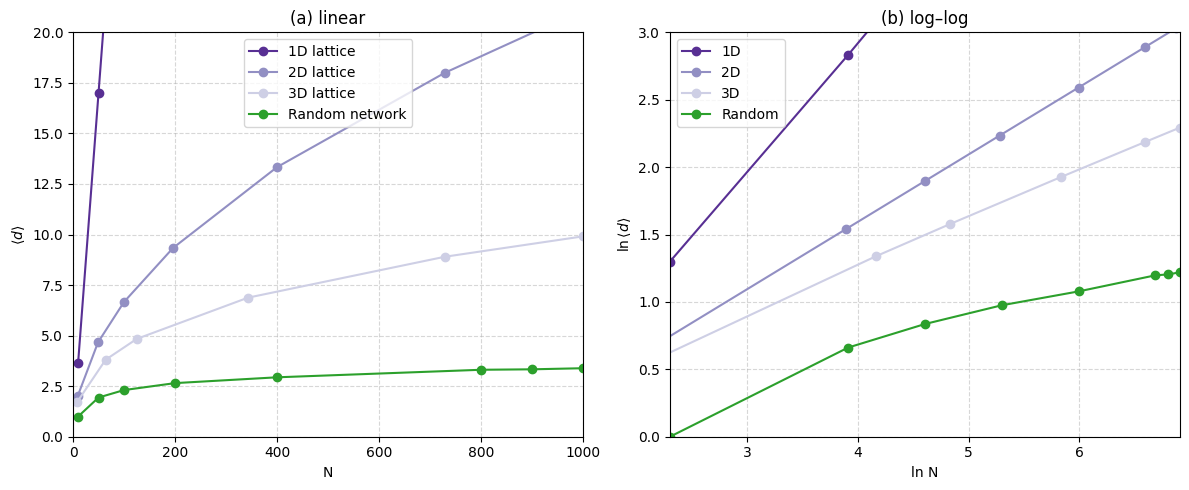

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 1) Define network sizes
# sizes_1d = [10,50, 100, 200, 400, 800, 900, 1000,3000,5000,10000]
# side_2d = [3,7, 10, 14, 20, 27, 31,50,100]
# side_3d = [2,4, 5, 7, 9, 10,15,21]


sizes_1d = [10,50, 100, 200, 400, 800, 900, 1000]
side_2d = [3,7, 10, 14, 20, 27, 31]
side_3d = [2,4, 5, 7, 9, 10]
k_rand = 9

# 2) Colors: three purples from Purples colormap, one green
cmap_p = plt.cm.Purples
colors = {
    '1d': cmap_p(0.85),
    '2d': cmap_p(0.55),
    '3d': cmap_p(0.30),
    'rand': '#2ca02c'
}

# 3) Compute ⟨d⟩
def compute_avg_distances():
    N1, d1 = [], []
    for N in sizes_1d:
        G = nx.path_graph(N)
        N1.append(N)
        d1.append(nx.average_shortest_path_length(G))

    N2, d2 = [], []
    for n in side_2d:
        G = nx.grid_2d_graph(n, n)
        G = nx.convert_node_labels_to_integers(G)
        N2.append(G.number_of_nodes())
        d2.append(nx.average_shortest_path_length(G))

    N3, d3 = [], []
    for n in side_3d:
        G = nx.grid_graph(dim=[n, n, n])
        G = nx.convert_node_labels_to_integers(G)
        N3.append(G.number_of_nodes())
        d3.append(nx.average_shortest_path_length(G))

    Nr, dr = [], []
    for N in sizes_1d:
        p = k_rand / (N - 1)
        while True:
            Gr = nx.erdos_renyi_graph(N, p)
            if nx.is_connected(Gr):
                break
        Nr.append(N)
        dr.append(nx.average_shortest_path_length(Gr))

    return np.array(N1), np.array(d1), np.array(N2), np.array(d2), np.array(N3), np.array(d3), np.array(Nr), np.array(dr)

N1, d1, N2, d2, N3, d3, Nr, dr = compute_avg_distances()

# 4) Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# (a) linear
ax1.plot(N1, d1, '-o', color=colors['1d'], label='1D lattice')
ax1.plot(N2, d2, '-o', color=colors['2d'], label='2D lattice')
ax1.plot(N3, d3, '-o', color=colors['3d'], label='3D lattice')
ax1.plot(Nr, dr, '-o', color=colors['rand'], label='Random network')
ax1.set_xlabel('N'); ax1.set_ylabel(r'$\langle d\rangle$'); ax1.set_title('(a) linear')
ax1.grid(True, ls='--', alpha=0.5); ax1.legend()
ax1.set_xlim([0,np.max(sizes_1d)])
ax1.set_ylim([0,20])
# (b) log–log
ax2.plot(np.log(N1), np.log(d1), '-o', color=colors['1d'], label='1D')
ax2.plot(np.log(N2), np.log(d2), '-o', color=colors['2d'], label='2D')
ax2.plot(np.log(N3), np.log(d3), '-o', color=colors['3d'], label='3D')
ax2.plot(np.log(Nr), np.log(dr), '-o', color=colors['rand'], label='Random')
ax2.set_xlabel('ln N'); ax2.set_ylabel(r'$\ln\langle d\rangle$'); ax2.set_title('(b) log–log')
ax2.grid(True, ls='--', alpha=0.5); ax2.legend()
ax2.set_xlim([np.log(np.min(sizes_1d)),np.log(np.max(sizes_1d))])
ax2.set_ylim([0,3])
plt.tight_layout()
plt.show()


## Small world in random network

In [16]:
# load real graphs
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
graph_list=[]
name_list=[]
# downloaded from https://www.wormwiring.org/
df = pd.read_excel('./Data/celegans_connectome.xlsx')
chemical_synapses = df[df['Type'] == 'S']

# Inspect the DataFrame to identify the correct columns
# print(df.columns)

G_celegans = nx.from_pandas_edgelist(chemical_synapses, source='Neuron 1', target='Neuron 2', create_using=nx.DiGraph())
graph_list.append(G_celegans)
name_list.append("C. elegans connectome")

G_collab = nx.read_gml("./Data/cond-mat-2005/cond-mat-2005.gml", label="id")
graph_list.append(G_collab)
name_list.append("Collaboration network")

G_social =  nx.read_edgelist("./Data/facebook_combined.txt", nodetype=int)
graph_list.append(G_social)
name_list.append("Facebook Social network")



In [ ]:
rows = []
for name, G in zip(name_list, graph_list):
    # Basic counts
    N = G.number_of_nodes()
    L = G.number_of_edges()
    avg_k = sum(dict(G.degree()).values()) / N

    # --- extract largest connected component (undirected) ---
    if G.is_directed():
        # for directed graphs, use weak connectivity
        comps = nx.weakly_connected_components(G)
    else:
        comps = nx.connected_components(G)
    comp = max(comps, key=len)
    # make H undirected so path‐length funcs never complain
    H = G.subgraph(comp).copy().to_undirected()

    # --- compute distances on H ---
    avg_d = nx.average_shortest_path_length(H)
    diam  = nx.diameter(H)

    ratio = np.log(N) / np.log(avg_k)

    rows.append({
        'Network':   name,
        'N':         N,
        'L':         L,
        '‹k›':       avg_k,
        '‹d›':       avg_d,
        'dmax':      diam,
        'lnN/ln‹k›': ratio
    })

df = pd.DataFrame(rows)
print(df.to_string(index=False))


                Network     N      L       ‹k›      ‹d›  dmax  lnN/ln‹k›
  C. elegans connectome   260    950  7.307692 3.365668     8   2.795819
  Collaboration network 40421 175692  8.693105 5.499374    18   4.904951
Facebook Social network  4039  88234 43.691013 3.692507     8   2.198422


## Clustering coefficient

In [30]:
import networkx as nx

# Parameters
n = 1000            # number of nodes
k_avg = 9          # desired average degree
p = k_avg / (n - 1) # connection probability

# Generate an ER random graph
G = nx.erdos_renyi_graph(n, p, seed=42)

# Compute clustering coefficients
local_cc = nx.clustering(G)             # dict of node→Ci
avg_cc = nx.average_clustering(G)       # average of Ci
global_cc = nx.transitivity(G)          # C = 3×#triangles / #connected triples

print(f"Theoretical ⟨C⟩ = p                  = {1/n:.4f}")
print(f"Simulated average clustering ⟨C⟩ = {avg_cc:.4f}")
print(f"Simulated global clustering (transitivity) = {global_cc:.4f}")


Theoretical ⟨C⟩ = p                  = 0.0010
Simulated average clustering ⟨C⟩ = 0.0104
Simulated global clustering (transitivity) = 0.0094


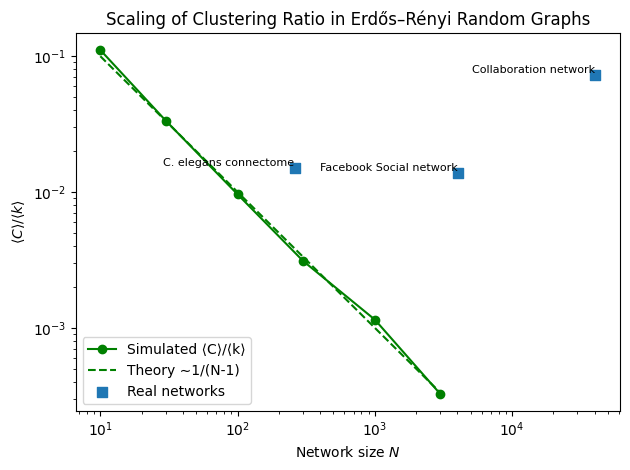

In [29]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Ns = [10, 30, 100, 300, 1000, 3000]  # network sizes
k_avg = 9                          # target average degree

ratios = []
theory = []

for N in Ns:
    p = k_avg / (N - 1)
    G = nx.erdos_renyi_graph(N, p, seed=42)
    
    # Compute simulated values
    avg_C = nx.average_clustering(G)
    avg_k = sum(dict(G.degree()).values()) / N
    ratios.append(avg_C / avg_k)
    
    # Theoretical expectation: ⟨C⟩/⟨k⟩ = 1/(N-1)
    theory.append(1 / (N ))
real_N      = []
real_ratios = []
for G, label in zip(graph_list, name_list):
    N_real = G.number_of_nodes()
    C_real = nx.average_clustering(G)
    k_real = sum(dict(G.degree()).values())/N_real
    real_N.append(N_real)
    real_ratios.append(C_real/k_real)

# Plotting
plt.figure()
plt.loglog(Ns, ratios,c="green", marker='o', label='Simulated ⟨C⟩/⟨k⟩')
plt.loglog(Ns, theory,c="green", linestyle='--', label='Theory ∼1/(N-1)')

plt.scatter(real_N, real_ratios,
            marker='s', s=60,  label='Real networks')
# annotate each real network
for x,y,label in zip(real_N, real_ratios, name_list):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')
plt.xlabel('Network size $N$')
plt.ylabel(r'$\langle C \rangle / \langle k \rangle$')
plt.title('Scaling of Clustering Ratio in Erdős–Rényi Random Graphs')
plt.legend()
plt.tight_layout()
plt.show()


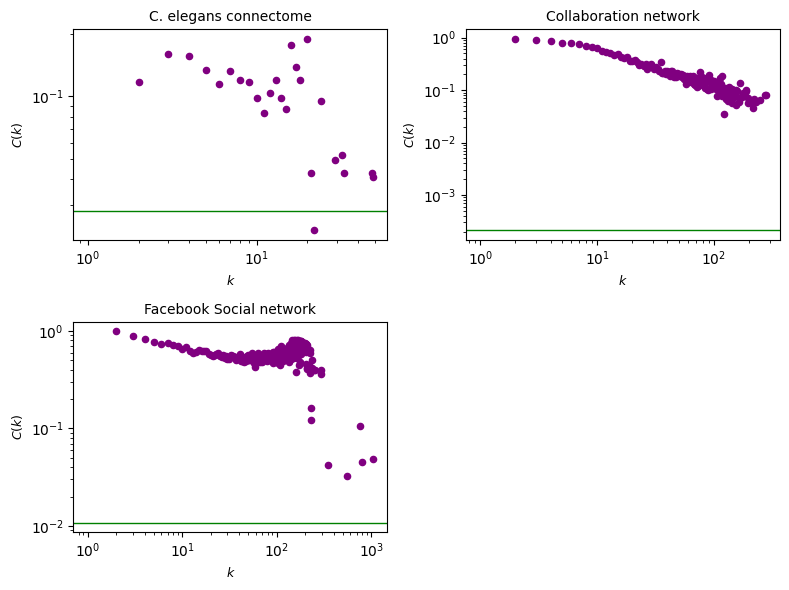

In [31]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


n = len(graph_list)
cols = 2
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3), sharex=False, sharey=False)
axes = axes.flatten()

for ax, G, label in zip(axes, graph_list, name_list):
    # 1) bin nodes by degree and compute C(k)
    deg2clust = defaultdict(list)
    for node, ci in nx.clustering(G).items():
        deg2clust[G.degree(node)].append(ci)
    ks = np.array(sorted(deg2clust.keys()))
    Ck = np.array([np.mean(deg2clust[k]) for k in ks])
    
    # 2) plot real data as purple scatter
    ax.scatter(ks, Ck, color='purple', s=20)
    
    # 3) compute ER‐prediction p = <k>/(N−1) and plot as green line
    N = G.number_of_nodes()
    k_avg = np.mean([d for _, d in G.degree()])
    p_rand = k_avg/(N)
    ax.axhline(p_rand, color='green', linewidth=1)
    
    # 4) styling
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(label, fontsize=10)
    ax.set_xlabel(r'$k$', fontsize=9)
    ax.set_ylabel(r'$C(k)$', fontsize=9)

# remove empty subplots
for ax in axes[n:]:
    fig.delaxes(ax)

fig.tight_layout()
plt.show()


Note: I think the figure in original book is wrong (Image 3.13 b-d). 

## Watts-Strogatz Model

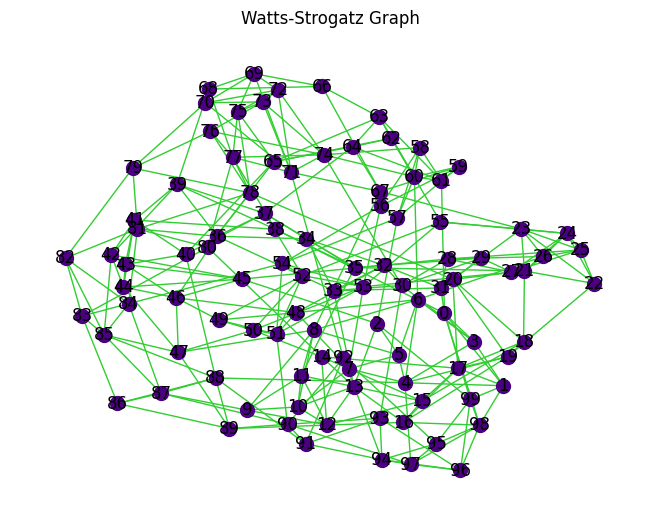

In [32]:
import random
import networkx as nx

def generate_watts_strogatz_graph(N, k, p, seed=None):
    """
    Generate a Watts–Strogatz small-world network as a NetworkX Graph,
    without using the built-in networkx.watts_strogatz_graph.

    Parameters
    ----------
    N : int
        Number of nodes in the graph.
    k : int
        Each node is connected to k nearest neighbors in the ring (k must be even).
    p : float
        Rewiring probability (0 ≤ p ≤ 1).
    seed : int, optional
        Random seed for reproducibility.

    Returns
    -------
    G : networkx.Graph
        The generated Watts–Strogatz graph.
    """
    if k % 2 != 0:
        raise ValueError("k must be even")
    if not (0 <= p <= 1):
        raise ValueError("p must be between 0 and 1")
    if seed is not None:
        random.seed(seed)

    G = nx.Graph()
    G.add_nodes_from(range(N))
    half_k = k // 2

    # 1) Build the initial ring lattice
    for i in range(N):
        for j in range(1, half_k + 1):
            v = (i + j) % N
            G.add_edge(i, v)

    # 2) Rewire each original "clockwise" edge (i → i+j)
    original_edges = [(i, (i + j) % N) for i in range(N) for j in range(1, half_k + 1)]
    for i, v in original_edges:
        if random.random() < p and G.has_edge(i, v):
            G.remove_edge(i, v)
            # choose a new endpoint w ≠ i and not already connected to i
            possible = set(range(N)) - {i} - set(G.neighbors(i))
            if possible:
                w = random.choice(list(possible))
                G.add_edge(i, w)
            else:
                # if no valid w exists, restore the original edge
                G.add_edge(i, v)

    return G

N = 100      # number of nodes
k = 6        # each node connects to 3 neighbors on each side
p = 0.2      # 20% rewiring probability
G = generate_watts_strogatz_graph(N, k, p, seed=42)

nx.draw(G, with_labels=True, node_color='indigo', node_size=100, edge_color='limegreen')

plt.title("Watts-Strogatz Graph")
plt.show()

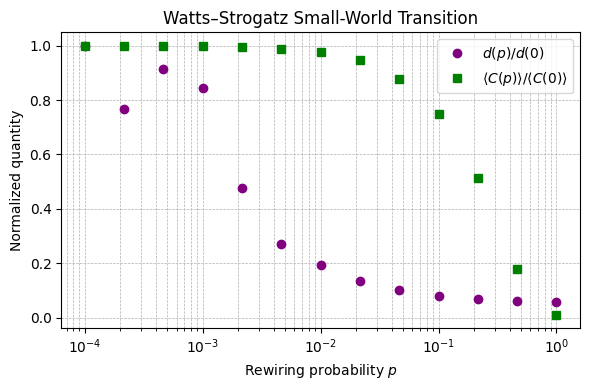

In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# — PARAMETERS —
N  = 1000                  # number of nodes
k  = 9                    # each node is connected to k nearest neighbors
ps = np.logspace(-4, 0, 13)  # p values from 10^-4 to 1

# — BASELINE at p=0 —
G0 = nx.watts_strogatz_graph(N, k, 0, seed=42)
C0 = nx.average_clustering(G0)
d0 = nx.average_shortest_path_length(G0)

# — COLLECT for each p —
C_p = []
d_p = []
for p in ps:
    G = nx.watts_strogatz_graph(N, k, p, seed=42)
    C_p.append(nx.average_clustering(G))
    try:
        d_p.append(nx.average_shortest_path_length(G))
    except nx.NetworkXError:
        d_p.append(np.nan)  # disconnected => skip

C_p = np.array(C_p)
d_p = np.array(d_p)

# — NORMALIZED CURVES —
clust_ratio = C_p / C0
dist_ratio  = d_p / d0

# — PLOTTING —
plt.figure(figsize=(6,4))
plt.semilogx(ps, dist_ratio, 'o', color='purple',
             label=r'$d(p)/d(0)$')
plt.semilogx(ps, clust_ratio, 's', color='green',
             label=r'$\langle C(p)\rangle/\langle C(0)\rangle$')

plt.xlabel('Rewiring probability $p$')
plt.ylabel('Normalized quantity')
plt.title('Watts–Strogatz Small-World Transition')
plt.legend(loc='best')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
